## Neural Networks

## Fire-Forest Dataset
### Predict the Burned Area of the Forest Fires using Neural Networks

## 1. Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

## 2. Import Data

In [2]:
forestfires_data=pd.read_csv('forestfires.csv')
forestfires_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


## 3. Initial Analysis

In [3]:
forestfires_data.shape

(517, 31)

In [4]:
forestfires_data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [5]:
forestfires_data.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [6]:
forestfires_data.describe(include='all')

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
count,517,517,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517
unique,12,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,aug,sun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,small
freq,184,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,378
mean,NaN,NaN,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,...,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689,NaN
std,NaN,NaN,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,...,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632,NaN
min,NaN,NaN,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


## 4. Data Pre-Processing

In [7]:
# Since we have dummy variables for month and day and also months and day columns we remove one among them.
forestfires_data.drop(forestfires_data.iloc[:,11:-1], axis=1, inplace=True)
#forestfires_data=forestfires_data.drop(['month','day'], axis=1)
forestfires_data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [8]:
label_encoder=LabelEncoder()
forestfires_data[['month','day']]=forestfires_data[['month','day']].apply(label_encoder.fit_transform)
forestfires_data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [9]:
#Converting categorical values to numeric
forestfires_data['size_category']=forestfires_data['size_category'].apply(lambda x: 1 if x=='large' else 0)
forestfires_data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0


In [10]:
#Normalizing the Data
def norm_fun(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [11]:
forestfires_data_norm=norm_fun(forestfires_data)
forestfires_data_norm.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,0.636364,0.000000,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.0,0.0
1,0.909091,0.833333,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.0,0.0
2,0.909091,0.333333,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.0,0.0
3,0.636364,0.000000,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.0,0.0
4,0.636364,0.500000,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.0,0.0


## 5. Model Building

In [12]:
X=forestfires_data_norm.iloc[:,:-1]
y=forestfires_data[['size_category']]

In [13]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=10, stratify=y, shuffle=True)

In [14]:
X_train.shape, y_train.shape

((387, 11), (387, 1))

In [15]:
X_test.shape, y_test.shape

((130, 11), (130, 1))

### 5.1 Building Model Architecture

In [16]:
model = Sequential()
model.add(Dense(units=12, input_dim=11, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=10, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                144       
                                                                 
 dense_1 (Dense)             (None, 10)                130       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 285
Trainable params: 285
Non-trainable params: 0
_________________________________________________________________


### 5.2 Model Compilation

In [17]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

## 6. Model Training

In [18]:
model_training=model.fit( x=X_train,y=y_train,batch_size=10,epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
39/39 [==============================] - 2s 11ms/step - loss: 0.6812 - accuracy: 0.7313 - val_loss: 0.6664 - val_accuracy: 0.7308
Epoch 2/100
39/39 [==============================] - 0s 4ms/step - loss: 0.6485 - accuracy: 0.7313 - val_loss: 0.6276 - val_accuracy: 0.7308
Epoch 3/100
39/39 [==============================] - 0s 4ms/step - loss: 0.6122 - accuracy: 0.7313 - val_loss: 0.5987 - val_accuracy: 0.7308
Epoch 4/100
39/39 [==============================] - 0s 4ms/step - loss: 0.5924 - accuracy: 0.7313 - val_loss: 0.5879 - val_accuracy: 0.7308
Epoch 5/100
39/39 [==============================] - 0s 4ms/step - loss: 0.5867 - accuracy: 0.7313 - val_loss: 0.5857 - val_accuracy: 0.7308
Epoch 6/100
39/39 [==============================] - 0s 4ms/step - loss: 0.5846 - accuracy: 0.7313 - val_loss: 0.5849 - val_accuracy: 0.7308
Epoch 7/100
39/39 [==============================] - 0s 4ms/step - loss: 0.5839 - accuracy: 0.7313 - val_loss: 0.5848 - val_accuracy: 0.7308
Epoch 8/100


Epoch 59/100
39/39 [==============================] - 0s 4ms/step - loss: 0.5571 - accuracy: 0.7313 - val_loss: 0.5690 - val_accuracy: 0.7308
Epoch 60/100
39/39 [==============================] - 0s 4ms/step - loss: 0.5558 - accuracy: 0.7313 - val_loss: 0.5679 - val_accuracy: 0.7308
Epoch 61/100
39/39 [==============================] - 0s 4ms/step - loss: 0.5541 - accuracy: 0.7313 - val_loss: 0.5675 - val_accuracy: 0.7308
Epoch 62/100
39/39 [==============================] - 0s 4ms/step - loss: 0.5532 - accuracy: 0.7313 - val_loss: 0.5670 - val_accuracy: 0.7308
Epoch 63/100
39/39 [==============================] - 0s 4ms/step - loss: 0.5507 - accuracy: 0.7313 - val_loss: 0.5647 - val_accuracy: 0.7308
Epoch 64/100
39/39 [==============================] - 0s 4ms/step - loss: 0.5503 - accuracy: 0.7313 - val_loss: 0.5638 - val_accuracy: 0.7308
Epoch 65/100
39/39 [==============================] - 0s 4ms/step - loss: 0.5482 - accuracy: 0.7313 - val_loss: 0.5626 - val_accuracy: 0.7308
Epoch 

## 7. Model Performance

### Model Accuracy Performance

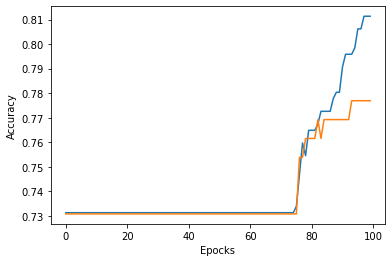

In [19]:
plt.plot(model_training.history['accuracy'], label='Train Accuracy')
plt.plot(model_training.history['val_accuracy'], label='Test Accuracy')

plt.xlabel('Epocks')
plt.ylabel('Accuracy')
plt.show()

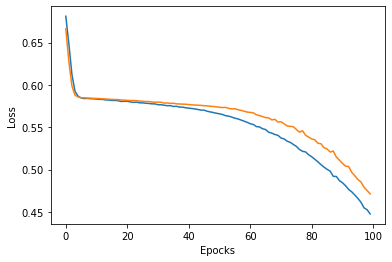

In [20]:
plt.plot(model_training.history['loss'], label='Train Loss')
plt.plot(model_training.history['val_loss'], label='Test Loss')

plt.xlabel('Epocks')
plt.ylabel('Loss')
plt.show()

## 8. Model Evaluation

In [21]:
model.evaluate(x=X_test, y=y_test)

5/5 [==============================] - 0s 5ms/step - loss: 0.4712 - accuracy: 0.7769


[0.47120678424835205, 0.7769230604171753]

## 9. Model Prediction

In [22]:
y_pred=model.predict(X_test)

In [23]:
y_test.iloc[[6],:]

,size_category
233,1


In [24]:
np.round(y_pred[6])

array([1.], dtype=float32)

## Model Optimization

In [25]:
#Optimizing the model by tweeking 'dropout' hyperparameter
model=Sequential()
model.add(Dense(units=10, input_dim=11, activation='relu'))
model.add(Dropout(0.10))
model.add(Dense(units=6, activation='relu'))
model.add(Dropout(0.10))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                120       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_4 (Dense)             (None, 6)                 66        
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [27]:
model_training=model.fit( x=X_train,y=y_train,batch_size=10,epochs=80, validation_data=(X_test, y_test))

Epoch 1/80
39/39 [==============================] - 1s 10ms/step - loss: 0.6315 - accuracy: 0.7209 - val_loss: 0.6208 - val_accuracy: 0.7308
Epoch 2/80
39/39 [==============================] - 0s 4ms/step - loss: 0.5977 - accuracy: 0.7287 - val_loss: 0.6040 - val_accuracy: 0.7308
Epoch 3/80
39/39 [==============================] - 0s 5ms/step - loss: 0.6050 - accuracy: 0.7080 - val_loss: 0.6009 - val_accuracy: 0.7308
Epoch 4/80
39/39 [==============================] - 0s 5ms/step - loss: 0.6072 - accuracy: 0.7235 - val_loss: 0.5997 - val_accuracy: 0.7308
Epoch 5/80
39/39 [==============================] - 1s 18ms/step - loss: 0.6016 - accuracy: 0.7261 - val_loss: 0.5987 - val_accuracy: 0.7308
Epoch 6/80
39/39 [==============================] - 1s 18ms/step - loss: 0.5914 - accuracy: 0.7313 - val_loss: 0.5983 - val_accuracy: 0.7308
Epoch 7/80
39/39 [==============================] - 1s 14ms/step - loss: 0.5894 - accuracy: 0.7313 - val_loss: 0.5972 - val_accuracy: 0.7308
Epoch 8/80
39/39

## Model Performance and Evaluation

### Model Accuracy Performance

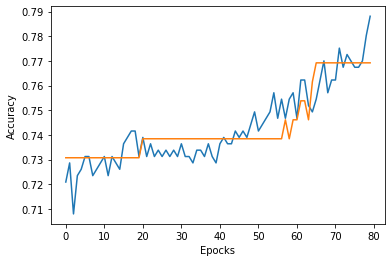

In [28]:
plt.plot(model_training.history['accuracy'], label='Train Accuracy')
plt.plot(model_training.history['val_accuracy'], label='Test Accuracy')

plt.xlabel('Epocks')
plt.ylabel('Accuracy')
plt.show()

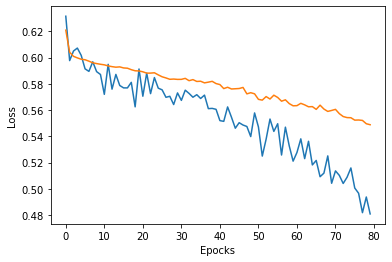

In [29]:
plt.plot(model_training.history['loss'], label='Train Loss')
plt.plot(model_training.history['val_loss'], label='Test Loss')

plt.xlabel('Epocks')
plt.ylabel('Loss')
plt.show()

In [30]:
model.evaluate(x=X_test, y=y_test)

5/5 [==============================] - 0s 5ms/step - loss: 0.5488 - accuracy: 0.7692


[0.5487863421440125, 0.7692307829856873]

### Model Prediction

In [31]:
y_pred=model.predict(X_test)

In [32]:
y_test.iloc[[0],:]

,size_category
391,1


In [33]:
np.round(y_pred[6])

array([1.], dtype=float32)

## =======================================================================